In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [14]:
df = pd.read_csv('data/study_performance.csv')
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [15]:
#Correlation matrix between scores
def relationship_score_gender(df):
    # Compute the correlation matrix for the numerical score variables
    correlation_matrix = df[['math_score', 'reading_score', 'writing_score']].corr()

    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Scores')
    plt.show()
    plt.close()

    # Separate scores by gender
    male_scores = df[df['gender'] == 'male'][['math_score', 'reading_score', 'writing_score']]
    female_scores = df[df['gender'] == 'female'][['math_score', 'reading_score', 'writing_score']]

    # Calculate average scores for each gender
    average_male_scores = male_scores.mean()
    average_female_scores = female_scores.mean()

    # Define labels and bar width
    labels = ['Math Score', 'Reading Score', 'Writing Score']
    bar_width = 0.35

    # Set position of bar on X axis
    r1 = np.arange(len(labels))
    r2 = [x + bar_width for x in r1]

    # Make the plot
    plt.bar(r1, average_male_scores, color='#95BDFF', width=bar_width, edgecolor='grey', label='Male')
    plt.bar(r2, average_female_scores, color='#FFD4B2', width=bar_width, edgecolor='grey', label='Female')

    # Add xticks on the middle of the group bars
    plt.xlabel('Scores', fontweight='bold')
    plt.xticks([r + bar_width/2 for r in range(len(average_male_scores))], labels)
    plt.ylabel('Average Score')
    plt.title('Average Scores by Gender')

    # Create legend & Show graphic
    plt.legend()
    plt.show()
    plt.close()

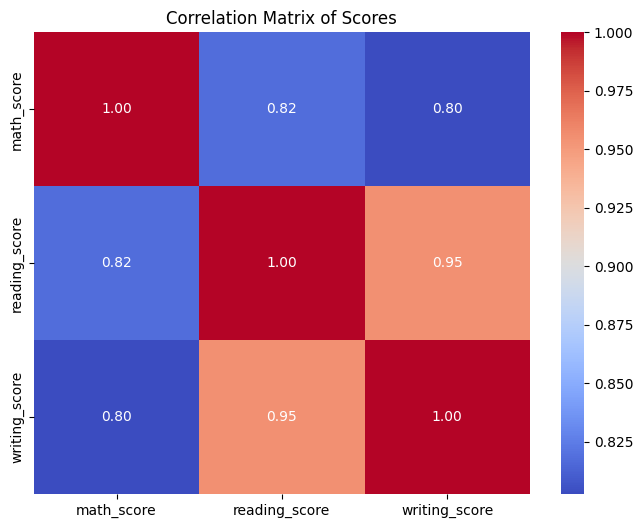

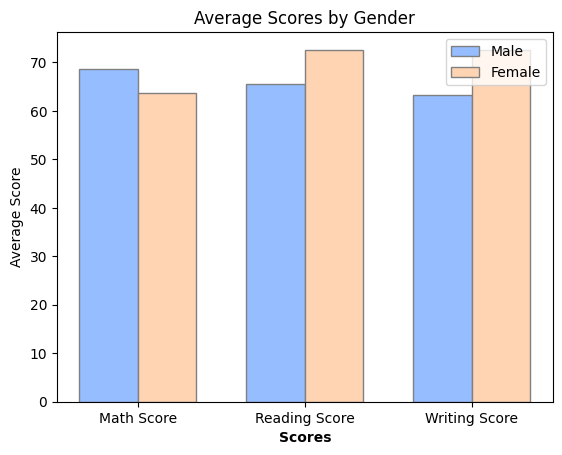

In [16]:
relationship_score_gender(df)

In [17]:
def relationship_score_parental(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='parental_level_of_education', data=df, palette='coolwarm', order=sorted(df['parental_level_of_education'].unique()))
    plt.title('Distribution of Parental Level of Education')
    plt.xticks(rotation=45)
    plt.show()
    plt.close()
    
    fig, axes = plt.subplots(3, 1, figsize=(14, 18))

    # Box plots for scores by parental level of education
    score_columns = ['math_score', 'reading_score', 'writing_score']
    titles = ['Math Scores by Parental Level of Education', 'Reading Scores by Parental Level of Education', 'Writing Scores by Parental Level of Education']

    for i, score in enumerate(score_columns):
        sns.boxplot(x='parental_level_of_education', y=score, data=df, ax=axes[i], palette='Set2')
        axes[i].set_title(titles[i])
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
        axes[i].set_xlabel('Parental Level of Education')
        axes[i].set_ylabel(score.capitalize().replace('_', ' '))

    plt.tight_layout()
    plt.show()
    plt.close()

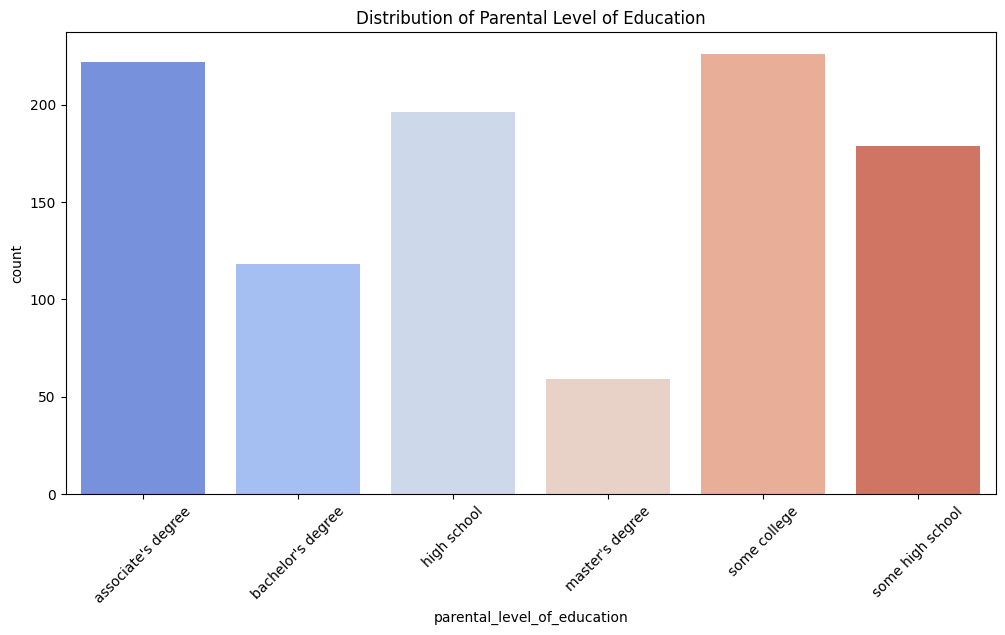

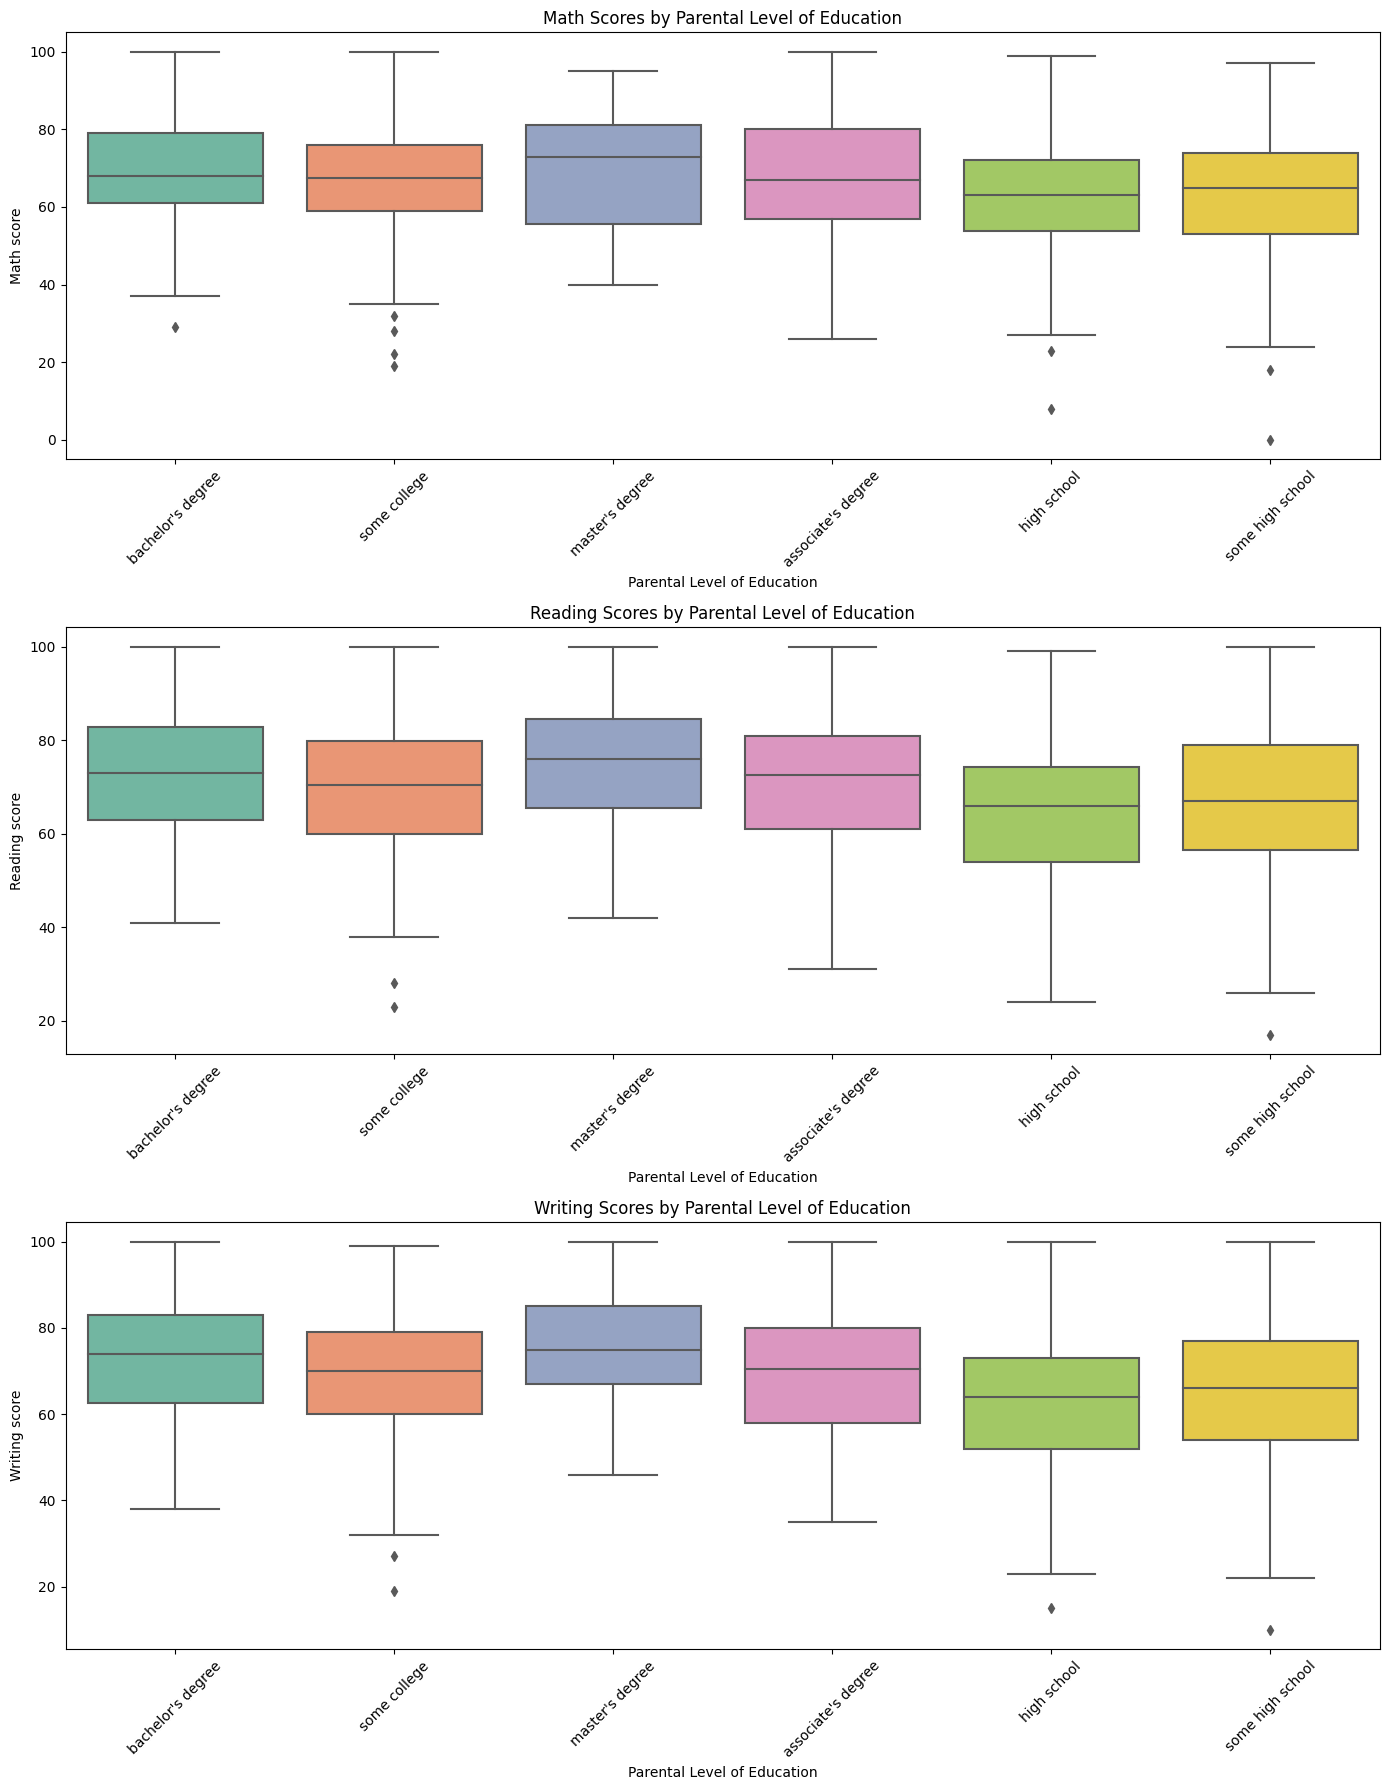

In [18]:
relationship_score_parental(df)

In [19]:
def relationship_score_preparation(df):
    not_prepared = df[df['test_preparation_course'] == 'none'][['math_score', 'reading_score', 'writing_score']]
    prepared = df[df['test_preparation_course'] == 'completed'][['math_score', 'reading_score', 'writing_score']]
    
    # Calculate average scores for each gender
    average_not_prepared = not_prepared.mean()
    average_prepared = prepared.mean()
    
    labels = ['Math Score', 'Reading Score', 'Writing Score']
    bar_width = 0.35
    
    # Set position of bar on X axis
    r1 = np.arange(len(labels))
    r2 = [x + bar_width for x in r1]

    # Make the plot
    plt.bar(r1, average_not_prepared, color='#95BDFF', width=bar_width, edgecolor='grey', label='Not prepared')
    plt.bar(r2, average_prepared, color='#FFD4B2', width=bar_width, edgecolor='grey', label='Prepared')

    # Add xticks on the middle of the group bars
    plt.xlabel('Scores', fontweight='bold')
    plt.xticks([r + bar_width/2 for r in range(len(average_not_prepared))], labels)
    plt.ylabel('Average Score')
    plt.title('Average Scores by Preparation')

    # Create legend & Show graphic
    plt.legend()
    plt.show()
    plt.close()

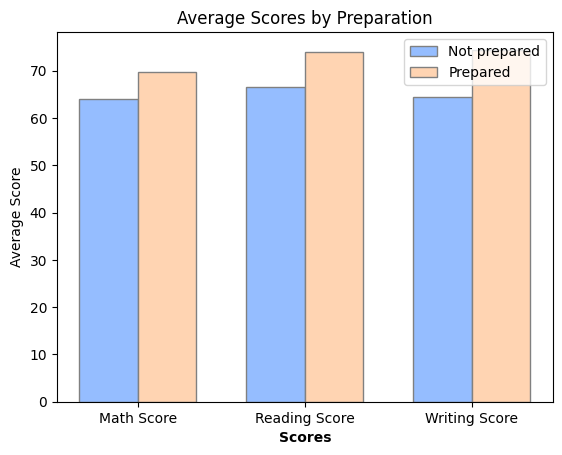

In [20]:
relationship_score_preparation(df)